<CENTER>
    <h1> Geospatial Data Science Applications: GEOG 4/590</h1>
    <h3>Jan 24, 2022</h3>
    <h2>Lecture 4: Gridded data</h2>
    <img src="images/coding-computer-programming.jpeg" width="300"/>
    <h3>Johnny Ryan: jryan4@uoregon.edu</h3>
</CENTER>

## Content of this lecture

* Quick review of raster data 
<br>
<br>
* Bit of history about handling raster data in Python
<br>
<br>
* Introduce `GDAL`, `rasterio`, and `xarray` libararies
<br>
<br>
* Learn how to read, inspect, manipulate, and write raster data using these libraries
<br>
<br>
* Background for this week's lab

## Raster data

* Raster data represent a matrix of cells (or pixels) organized into rows and columns (or a grid)

<img src="images/raster_concept.png" alt="https://www.neonscience.org/resources/learning-hub/tutorials/dc-raster-data-r" width="500"/>

### Examples: surface maps

* Grid cells can represent data that changes **continuously** across a landscape (surface) such as elevation or air temperature.

<img src="images/elevation.gif" alt="https://desktop.arcgis.com/en/arcmap/10.3/manage-data/raster-and-images/what-is-raster-data.htm" width="400"/>

### Examples: satellite imagery

* Grid cells can represent from a satellite imagaing platforms such as reflectance.

<img src="images/satellite.gif" alt='https://desktop.arcgis.com/en/arcmap/10.3/manage-data/raster-and-images/what-is-raster-data.htm' width="400"/>

### Examples: classification maps

* Grid cells can also represent **discrete** data (e.g. vegetation type or land cover).

<img src="images/classification.gif" alt='https://desktop.arcgis.com/en/arcmap/10.3/manage-data/raster-and-images/what-is-raster-data.htm' width="600"/>

## Libraries

* There is one library for accessing raster data:

The **Geographic Raster Abstraction Library** or **GDAL**

* GDAL is written in C++ and ships with a C API.

* ArcGIS, QGIS, Google Earth etc. all use GDAL to read/write/analyze raster data under-the-hood

<img src="images/gdal.png" width="200"/>


## GDAL

* Supports read/write access for over **160 raster formats** (e.g. GeoTIFF, NetCDF4)


* Includes methods for:

    * Finding dataset information
    
    * Reprojecting
    
    * Resampling
    
    * Format conversion
    
    * Mosaicking
    
## Rasterio

* Developed in 2016 with the goal of expressing GDAL's data model in a more Pythonic way


* High performance, lower cognitive load, **more transparent code**


## NumPy

* Once we have read raster data in Python, we can apply **fast matrix operations** using `numpy`

<img src="images/numpy.png" width="300"/>

## xarray

* Introduces labels in the form of **dimensions**, **coordinates** and **attributes** on top of raw NumPy-like arrays

<img src="images/xarray.png" width="300"/>


## Let's get started...

In [1]:
# Import libraries
import numpy as np
import rasterio

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

### Open a raster file

Rasterio's `open()` function takes a **path string** and returns a **dataset object**. 

The path may point to a file of any supported raster format. 

Rasterio will open it using the proper GDAL format driver.

In [2]:
# Open raster file as dataset object
src = rasterio.open('data/N46W122.tif')
src

<open DatasetReader name='data/N46W122.tif' mode='r'>

### Dataset attributes

The **dataset object** contains a number of **attributes** which can be explored.

In [3]:
print("Number of bands:", src.count)

Number of bands: 1


A dataset band is an array of values representing **a single** variable in 2D space. 

All band arrays of a dataset have the **same** number of rows and columns.

In [4]:
print("Width:", src.width)
print("Height:", src.height)

Width: 3601
Height: 3601


### Dataset georeferencing

Raster data is different from an ordinary image because the pixels can be mapped to regions on the Earth's surface. 

Every pixels of a dataset is contained within a spatial bounding box.

In [5]:
src.bounds

BoundingBox(left=-122.00013888888888, bottom=45.999861111111116, right=-120.9998611111111, top=47.00013888888889)

The value of bounds attribute is derived from a more fundamental attribute: the dataset's geospatial transform.

In [6]:
src.transform

Affine(0.0002777777777777778, 0.0, -122.00013888888888,
       0.0, -0.0002777777777777778, 47.00013888888889)

But what do these values represent? These coordinate values are relative to the origin of the dataset’s coordinate reference system (CRS).

In [7]:
src.crs

CRS.from_epsg(4326)

In [8]:
src.transform

Affine(0.0002777777777777778, 0.0, -122.00013888888888,
       0.0, -0.0002777777777777778, 47.00013888888889)

The georeferencing of a raster dataset can be fully described by the `crs` and `transform` attributes.

### Reading raster data

Data from a raster band can be accessed by the band's index number. Following the GDAL convention, bands are indexed from 1.

In [9]:
# Read data in dataset object
srtm = src.read(1)

The `read()` method returns a `numpy` N-D array.

In [10]:
srtm

array([[ 487,  485,  484, ..., 1729, 1738, 1747],
       [ 490,  489,  488, ..., 1718, 1727, 1733],
       [ 492,  491,  490, ..., 1704, 1713, 1721],
       ...,
       [ 976,  979,  980, ..., 1111, 1113, 1116],
       [ 975,  979,  979, ..., 1111, 1113, 1116],
       [ 971,  972,  974, ..., 1112, 1114, 1116]], dtype=int16)

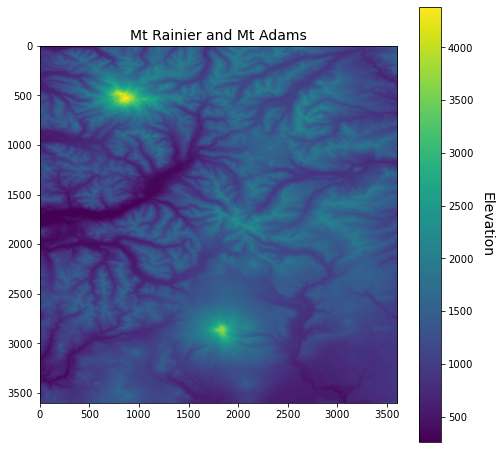

In [11]:
# Plot data
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(srtm)
ax.set_title("Mt Rainier and Mt Adams", fontsize=14)
cbar = fig.colorbar(im, orientation='vertical')
cbar.ax.set_ylabel('Elevation', rotation=270, fontsize=14)
cbar.ax.get_yaxis().labelpad = 20

### Indexing

Many GIS tasks require us to read a raster value at a given locations. 

Dataset objects have an `index()` method for deriving the **array indices** corresponding to points in **georeferenced space.**

Let's demonstrate with an example... what is the elevation of the summit of Mt Rainier? `(-121.760424, 46.852947)`

In [12]:
# Define latitude and longitude of summit
rainier_summit = [-121.760424, 46.852947]

# Find row/column in corresponding raster dataset
loc_idx = src.index(rainier_summit[0], rainier_summit[1])

print("Grid cell index:", loc_idx)

Grid cell index: (529, 862)


In [13]:
# Read value from dataset object
elevation = srtm[loc_idx]

print("The summit of Mt Rainier is at %.0f m" %elevation)

print('... which is equivalent to %.0f ft' %(elevation * 3.281))

The summit of Mt Rainier is at 4374 m
... which is equivalent to 14351 ft


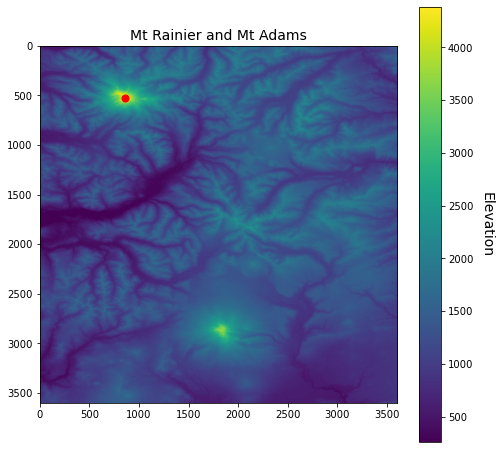

In [14]:
# Visualize
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(srtm)

# Plot a point on grid
ax.scatter(loc_idx[1], loc_idx[0], s=50, color='red')

ax.set_title("Mt Rainier and Mt Adams", fontsize=14)
cbar = fig.colorbar(im, orientation='vertical')
cbar.ax.set_ylabel('Elevation', rotation=270, fontsize=14)
cbar.ax.get_yaxis().labelpad = 20

### More indexing methods

How would we find the index of the **lowest elevation** in this raster?

In [15]:
# .argmin() returns the indices of the minimum values of an array
min_value = srtm.argmin()
print(min_value)

6060580


In [16]:
# Convert 1D index to 2D coordinates
low_idx = np.unravel_index(min_value, srtm.shape)
print(low_idx)

(1683, 97)


In [17]:
# Find elevation value
elevation = srtm[low_idx]

print("The lowest elevation is %.0f m" %elevation)

The lowest elevation is 262 m


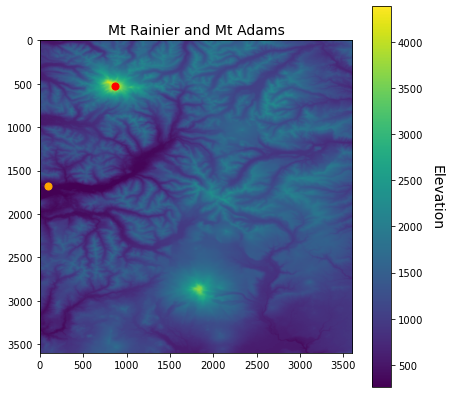

In [18]:
# Visualize data
fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(srtm)

# Plot a point on grid
ax.scatter(loc_idx[1], loc_idx[0], s=50, color='red')
ax.scatter(low_idx[1], low_idx[0], s=50, color='orange')

ax.set_title("Mt Rainier and Mt Adams", fontsize=14)
cbar = fig.colorbar(im, orientation='vertical')
cbar.ax.set_ylabel('Elevation', rotation=270, fontsize=14)
cbar.ax.get_yaxis().labelpad = 20

### Reprojecting

Rasterio can reproject raster data... but it's a bit of a mess!

<img src="images/rasterio_reproject.png" width="500"/>

Better to use GDAL command line tools.

`t_srs` stands for target spatial reference.

In [19]:
!gdalwarp -t_srs EPSG:32610 data/N46W122.tif data/N46W122_utm.tif

Processing data/N46W122.tif [1/1] : 0Using internal nodata values (e.g. -32768) for image data/N46W122.tif.
...10...20...30...40...50...60...70...80...90...100 - done.


We can execute **terminal commands** in jupyter notebook cells using `!`

In [20]:
src = rasterio.open('data/N46W122_utm.tif')
src.crs

CRS.from_epsg(32610)

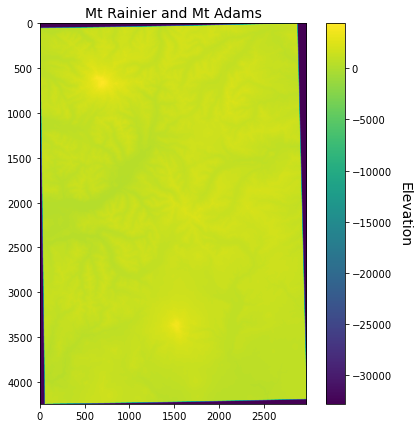

In [21]:
# Read data in file
srtm = src.read(1)

fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(srtm)

ax.set_title("Mt Rainier and Mt Adams", fontsize=14)
cbar = fig.colorbar(im, orientation='vertical')
cbar.ax.set_ylabel('Elevation', rotation=270, fontsize=14)
cbar.ax.get_yaxis().labelpad = 20

Our data no longer represents a rectangle/square after reprojecting so we introduced some `NoData` values

In [22]:
srtm

array([[-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       ...,
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768]], dtype=int16)

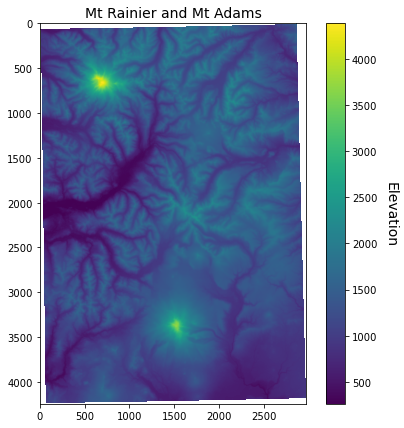

In [23]:
# Make NoData mask
srtm_masked = np.ma.masked_array(srtm, mask=(srtm == -32768))

fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(srtm_masked)

ax.set_title("Mt Rainier and Mt Adams", fontsize=14)
cbar = fig.colorbar(im, orientation='vertical')
cbar.ax.set_ylabel('Elevation', rotation=270, fontsize=14)
cbar.ax.get_yaxis().labelpad = 20

### Resampling

Is also easier with GDAL command line tools

In [24]:
!gdalwarp -tr 1000 -1000 data/N46W122_utm.tif data/N46W122_utm_1000.tif

Creating output file that is 79P x 113L.
Processing data/N46W122_utm.tif [1/1] : 0Using internal nodata values (e.g. -32768) for image data/N46W122_utm.tif.
Copying nodata values from source data/N46W122_utm.tif to destination data/N46W122_utm_1000.tif.
...10...20...30...40...50...60...70...80...90...100 - done.


`-tr` stands for target resolution

In [25]:
# Open new raster dataset
src = rasterio.open('data/N46W122_utm_1000.tif')

# Read new raster dataset
srtm_1000 = src.read(1)

# Mask data
srtm_1000_masked = np.ma.masked_array(srtm_1000, mask=(srtm_1000 == -32768))

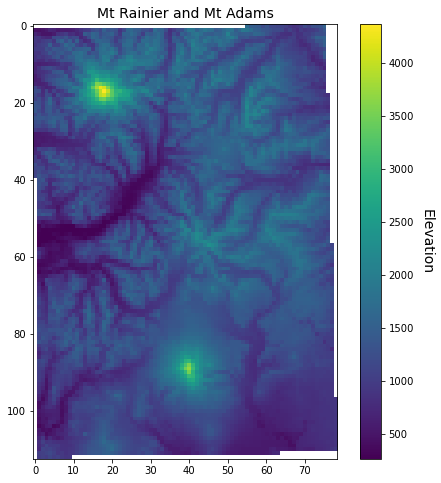

In [26]:
# Plot 
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(srtm_1000_masked)

ax.set_title("Mt Rainier and Mt Adams", fontsize=14)
cbar = fig.colorbar(im, orientation='vertical')
cbar.ax.set_ylabel('Elevation', rotation=270, fontsize=14)
cbar.ax.get_yaxis().labelpad = 20

## Multidimensional datasets

Sometimes we have raster data with a **third** or **fourth** dimension. 

3D could represent multiple spectral bands or pressure levels, 4D often represents **time**


<img src="images/xarray_data_structures.png" width="600"/>

`xarray` is the recommended package for reading, writing, and analyzing scientific datasets stored in `.nc` or `hdf` format.

Scientific datasets include climate and satellite data.

In [27]:
# Import library
import xarray as xr

In [28]:
# Read data
xds = xr.open_dataset('data/era_jul_dec_2020.nc')

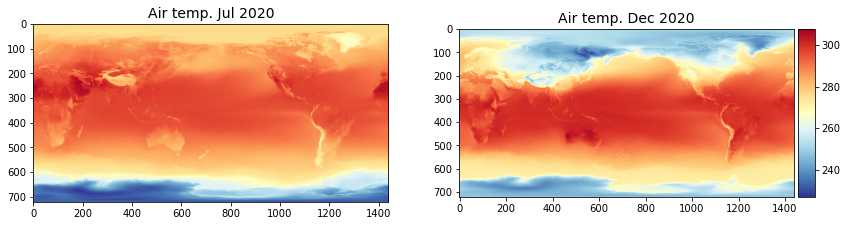

In [29]:
# Plot
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,4))

im1 = ax1.imshow(xds['t2m'][0,:,:], cmap='RdYlBu_r')
im2 = ax2.imshow(xds['t2m'][1,:,:], cmap='RdYlBu_r')

ax1.set_title("Air temp. Jul 2020", fontsize=14)
ax2.set_title("Air temp. Dec 2020", fontsize=14)

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

### Indexing multi-dimensional datasets

Since our `xarray` dataset is aware of the latitude and longitude coordinates, we can index values conveniently.

In [30]:
# Temperature at Kathmandu
temp = xds['t2m'].sel(latitude=27.7, longitude=85.3, method='nearest')

In [31]:
print('Jul 2020 air temperature = %.2f F' %((temp[0] - 273.15) * 9/5 + 32))
print('Dec 2020 air temperature = %.2f F' %((temp[1] - 273.15) * 9/5 + 32))

Jul 2020 air temperature = 71.54 F
Dec 2020 air temperature = 51.34 F


### Where is the coldest place on Earth (in Dec 2020)?

In [32]:
# .argmin() returns the indices of the minimum values of an array
min_value = xds['t2m'][1,:,:].argmin()
print(min_value)

<xarray.DataArray 't2m' ()>
array(150327)
Coordinates:
    time     datetime64[ns] 2020-12-01


In [33]:
# Convert 1D index to 2D coordinates
low_idx = np.unravel_index(min_value, xds['t2m'][1,:,:].shape)
print(low_idx)

(104, 567)


In [34]:
cold = xds['t2m'][1, low_idx[0], low_idx[1]].values
print('Coldest place on Earth was %.2f F' % ((cold - 273.15) * 9/5 + 32))

Coldest place on Earth was -51.02 F


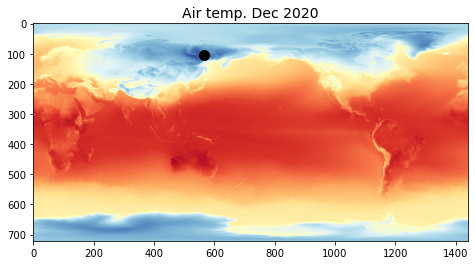

In [35]:
# Plot
fig, ax1 = plt.subplots(figsize=(14,4))

im1 = ax1.imshow(xds['t2m'][1,:,:], cmap='RdYlBu_r')

ax1.set_title("Air temp. Dec 2020", fontsize=14)
ax1.scatter(low_idx[1], low_idx[0], s=100, color='k')

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')